In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import is_object_dtype
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import warnings

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# train=pd.read_csv('/home/ivan_pronin/IT/kaggle/house-prices-advanced-regression-techniques/train.csv')
train=pd.read_csv('C:/Users/julal/IT/kaggle/house-prices-advanced-regression-techniques/train.csv')
# test=pd.read_csv('/home/ivan_pronin/IT/kaggle/house-prices-advanced-regression-techniques/test.csv')
test=pd.read_csv('C:/Users/julal/IT/kaggle/house-prices-advanced-regression-techniques/test.csv')
# data_description='/home/ivan_pronin/IT/kaggle/house-prices-advanced-regression-techniques/data_description.txt'
data_description='C:/Users/julal/IT/kaggle/house-prices-advanced-regression-techniques/data_description.txt'

In [4]:
train=train.drop(columns=['Alley', 'PoolQC','Fence', 'MiscFeature','GarageArea', 'MSSubClass'])
test=test.drop(columns=['Alley', 'PoolQC','Fence', 'MiscFeature','GarageArea', 'MSSubClass'])

In [5]:
print(train.shape)
print(test.shape)

(1460, 75)
(1459, 74)


In [6]:
nonnumeric_features=[]
for col in train.columns:
    if is_object_dtype(train[col]):
        nonnumeric_features.append(col)

In [7]:
train[nonnumeric_features].describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,588,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,3,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,445,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,1267,1198


In [8]:
train.loc[:, ~train.columns.isin(nonnumeric_features)].describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,730.50,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.51,1.77,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,421.61,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,1.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,365.75,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,730.50,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,1095.25,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,1460.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


In [9]:
with open(data_description, 'r') as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
#         if any(feature in line for feature in ['LotFrontage', 'MasVnrType', 'FireplaceQu']):
        if 'MSSubClass' in line:
            print(line)
            for j in range(i+1, min(i+10, len(lines))):
                print(lines[j])

MSSubClass: Identifies the type of dwelling involved in the sale.	



        20	1-STORY 1946 & NEWER ALL STYLES

        30	1-STORY 1945 & OLDER

        40	1-STORY W/FINISHED ATTIC ALL AGES

        45	1-1/2 STORY - UNFINISHED ALL AGES

        50	1-1/2 STORY FINISHED ALL AGES

        60	2-STORY 1946 & NEWER

        70	2-STORY 1945 & OLDER

        75	2-1/2 STORY ALL AGES



In [10]:
numeric_features=[]
for col in train.columns:
    if is_numeric_dtype(train[col]):
        numeric_features.append(col)
    else:
        pass
print(numeric_features)

['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [11]:
zero_data_set_sum_train=train.isnull().sum()
zero_data_set_percentage_train=train.isnull().sum()/train.shape[0]*100
zero_data_set_train=pd.DataFrame({'sum':zero_data_set_sum_train, 'percentage': zero_data_set_percentage_train})
zero=zero_data_set_train.loc[zero_data_set_train['sum']>0]

In [12]:
zero

,sum,percentage
LotFrontage,259,17.74
MasVnrType,872,59.73
MasVnrArea,8,0.55
BsmtQual,37,2.53
BsmtCond,37,2.53
BsmtExposure,38,2.60
BsmtFinType1,37,2.53
BsmtFinType2,38,2.60
Electrical,1,0.07
FireplaceQu,690,47.26


In [13]:
train[nonnumeric_features]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NaN,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,NaN,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal


In [14]:
# def calc_weights(dist):
#   weights=0.25**dist+0.0000001
#   return weights

In [15]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder

for col in zero.index:
    train2=train.copy()
    index_train=train2.loc[train2[col].isna()==False, col].index
    index_test=train2.loc[train2[col].isna()==True, col].index
    train2=train2.loc[:, ~train2.columns.isin(zero.index)]
    train2.drop(columns=['SalePrice'], inplace=True)
    y_train=train[col].loc[index_train]
    if col in nonnumeric_features:
        le_y = LabelEncoder()
        y_train=le_y.fit_transform(y_train)
    for feature in nonnumeric_features:
        if feature in train2.columns:
            le_x = LabelEncoder()
            train2[feature] = le_x.fit_transform(train2[feature])
    x_train=train2.loc[index_train]
    x_test=train2.loc[index_test]
    if x_train.shape[0]<6:
        neighbors=x_train.shape[0]
    else:
        neighbors=6
    if col in numeric_features:
        KNN_reg=KNeighborsRegressor(n_neighbors=neighbors, weights='distance')
        KNN_reg.fit(x_train,y_train)
        predictions=KNN_reg.predict(x_test)
        train.loc[index_test,col] = train.loc[index_test, col].fillna(predictions[0])
    else:
        KNN_clas=KNeighborsClassifier(n_neighbors=neighbors, weights='distance')
        KNN_clas.fit(x_train, y_train)
        predictions=KNN_clas.predict(x_test)
        predictions_transform = le_y.inverse_transform(predictions)
        train.loc[index_test, col] = train.loc[index_test, col].fillna(predictions_transform[0])

In [16]:
zero_data_set_sum_test=test.isnull().sum()
zero_data_set_percentage_test=test.isnull().sum()/test.shape[0]*100
zero_data_set_test=pd.DataFrame({'sum':zero_data_set_sum_test, 'percentage': zero_data_set_percentage_test})
zero2=zero_data_set_test.loc[zero_data_set_test['sum']>0]
zero2

,sum,percentage
MSZoning,4,0.27
LotFrontage,227,15.56
Utilities,2,0.14
Exterior1st,1,0.07
Exterior2nd,1,0.07
MasVnrType,894,61.27
MasVnrArea,15,1.03
BsmtQual,44,3.02
BsmtCond,45,3.08
BsmtExposure,44,3.02


In [17]:
for col in zero2.index:
    train2=test.copy()
    index_train=train2.loc[train2[col].isna()==False, col].index
    index_test=train2.loc[train2[col].isna()==True, col].index
    train2=train2.loc[:, ~train2.columns.isin(zero2.index)]
    y_train=test[col].loc[index_train]
    if col in nonnumeric_features:
        le_y = LabelEncoder()
        y_train=le_y.fit_transform(y_train)
    for feature in nonnumeric_features:
        if feature in train2.columns:
            le_x = LabelEncoder()
            train2[feature] = le_x.fit_transform(train2[feature])
    x_train=train2.loc[index_train]
    x_test=train2.loc[index_test]
    if x_train.shape[0]<6:
        neighbors=x_train.shape[0]
    else:
        neighbors=6
    if col in numeric_features:
        KNN_reg=KNeighborsRegressor(n_neighbors=neighbors, weights='distance')
        KNN_reg.fit(x_train,y_train)
        predictions=KNN_reg.predict(x_test)
        test.loc[index_test,col] = test.loc[index_test, col].fillna(predictions[0])
    else:
        KNN_clas=KNeighborsClassifier(n_neighbors=neighbors, weights='distance')
        KNN_clas.fit(x_train, y_train)
        predictions=KNN_clas.predict(x_test)
        predictions_transform = le_y.inverse_transform(predictions)
        test.loc[index_test, col] = test.loc[index_test, col].fillna(predictions_transform[0])

In [18]:
y2=train['SalePrice'].to_numpy().copy()
train2 = train.drop(columns=["SalePrice"]).copy()
test2 = test.copy()

In [19]:
train2.drop(columns=['Id'], inplace=True)
test2.drop(columns=['Id'], inplace=True)

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for feature in nonnumeric_features:
        train2[feature] = le.fit_transform(train2[feature])
        test2[feature] = le.transform(test2[feature])

In [21]:
smoth_columns=[
               'LotArea',
               ]

In [22]:
for col in smoth_columns:
    q1 = np.percentile(train[col], 25)
    q3 = np.percentile(train[col], 75)
    iqr = q3 - q1
    lower_bound = q1 - 2 * iqr
    upper_bound = q3 + 2 * iqr
    train.loc[(train[col] > upper_bound) | (train[col] < lower_bound), col] = np.nan
    train[col].interpolate(method='polynomial', order=5, inplace=True)

In [23]:
for col in smoth_columns:
    q1 = np.percentile(test[col], 25)
    q3 = np.percentile(test[col], 75)
    iqr = q3 - q1
    lower_bound = q1 - 2 * iqr
    upper_bound = q3 + 2 * iqr
    test.loc[(test[col] > upper_bound) | (test[col] < lower_bound), col] = np.nan
    test[col].interpolate(method='polynomial', order=5, inplace=True)

In [24]:
train.loc[train['PoolArea']>0, 'PoolArea']=1
test.loc[test['PoolArea']>0, 'PoolArea']=1

In [25]:
test['BsmtFullBath']=test['BsmtFullBath'].astype(int)

In [26]:
train['allSF']=train['TotalBsmtSF']+train['1stFlrSF']+train['2ndFlrSF']
test['allSF']=test['TotalBsmtSF']+test['1stFlrSF']+test['2ndFlrSF']

In [27]:
numeric_features.append('allSF')
numeric_features.remove('TotalBsmtSF')

In [28]:
train2=train2.astype(float)
test2=test2.astype(float)

In [29]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(train2, y2, test_size=0.2, random_state=2)

In [30]:
x_train2.shape, y_train2.shape, x_test2.shape, y_test2.shape

((1168, 73), (1168,), (292, 73), (292,))

In [31]:
# clf = xgb.XGBClassifier(seed=42, subsample=0.9)
# cv_results = cross_val_score(clf,x_train , y_train,cv=kfold , scoring='accuracy')
# y_pred = cross_val_predict(clf,x_test,y_test,cv=10)
# proba = cross_val_predict(clf,x_test,y_test,cv=10, method='predict_proba')
# clf.fit(x_train , y_train , verbose=0, eval_set =[(x_test, y_test)])

In [32]:
from xgboost import XGBRegressor
XG=XGBRegressor(
    booster = 'gbtree',
    learning_rate = 0.02,
    colsample_bylevel = 0.5,
    colsample_bytree = 0.5,
    max_depth = 10,
    n_estimators = 1750,
    # eval_metric = 'rmse',
    # early_stopping_rounds = 50,
    tree_method = 'auto'
    )

XG.fit(train2, y2,
    #    eval_set = [(x_train2, y_train2), (x_test2, y_test2)], 
       verbose = 100)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=0.5, colsample_bynode=None, colsample_bytree=0.5,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1750, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [33]:
y_pred_xg_train=XG.predict(train2)
y_pred_xg_test=XG.predict(test2)


In [34]:
importances = XG.get_booster().get_score(importance_type='weight')
importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)
importances

[('LotArea', 23535.0),
 ('LotFrontage', 19839.0),
 ('BsmtUnfSF', 13251.0),
 ('YearBuilt', 12981.0),
 ('GrLivArea', 12469.0),
 ('TotalBsmtSF', 11827.0),
 ('1stFlrSF', 11598.0),
 ('Neighborhood', 10657.0),
 ('BsmtFinSF1', 10403.0),
 ('YearRemodAdd', 10263.0),
 ('MoSold', 8324.0),
 ('MasVnrArea', 8019.0),
 ('GarageYrBlt', 7651.0),
 ('OpenPorchSF', 7291.0),
 ('WoodDeckSF', 6638.0),
 ('OverallQual', 6130.0),
 ('2ndFlrSF', 5788.0),
 ('OverallCond', 5769.0),
 ('Exterior1st', 5269.0),
 ('YrSold', 5238.0),
 ('LotShape', 5041.0),
 ('LotConfig', 4911.0),
 ('Exterior2nd', 4664.0),
 ('BsmtFinType1', 4638.0),
 ('MSZoning', 4464.0),
 ('HouseStyle', 4294.0),
 ('TotRmsAbvGrd', 4210.0),
 ('BsmtExposure', 3130.0),
 ('Condition1', 2689.0),
 ('HeatingQC', 2551.0),
 ('LandContour', 2513.0),
 ('BedroomAbvGr', 2417.0),
 ('BldgType', 2364.0),
 ('RoofStyle', 2318.0),
 ('Fireplaces', 2023.0),
 ('GarageFinish', 2007.0),
 ('SaleCondition', 1973.0),
 ('BsmtQual', 1914.0),
 ('FireplaceQu', 1882.0),
 ('GarageCars', 1

In [35]:
# train['Y_pred']=y_pred_xg_train
# test['Y_pred']=y_pred_xg_test

In [36]:
# numeric_features.append('Y_pred')

In [37]:
nonnumeric_features.extend([
                            'Id',
                            'BsmtFullBath',
                            ])

In [38]:
train[nonnumeric_features]=train[nonnumeric_features].astype('category')
test[nonnumeric_features]=test[nonnumeric_features].astype('category')

In [39]:
# data_list=['Neighborhood', 'BsmtQual', 'KitchenQual', 'FireplaceQu', 'ExterQual', 'GarageType', 'CentralAir', 'BsmtExposure']
# for col in data_list:
#     train[col]=train[col].astype(str)
# fig,ax=pl.subplots(1,8, figsize=(30,10))
# count=0
# for col in data_list:
#     ax[count].hist(train[col])
#     ax[count].set_xlabel(col)
#     count+=1
# plt.show()

array([[<Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>],
       [<Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>],
       [<Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>],
       [<Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'KitchenAbvGr'}>,
        <Axes: title={'center': 'TotR

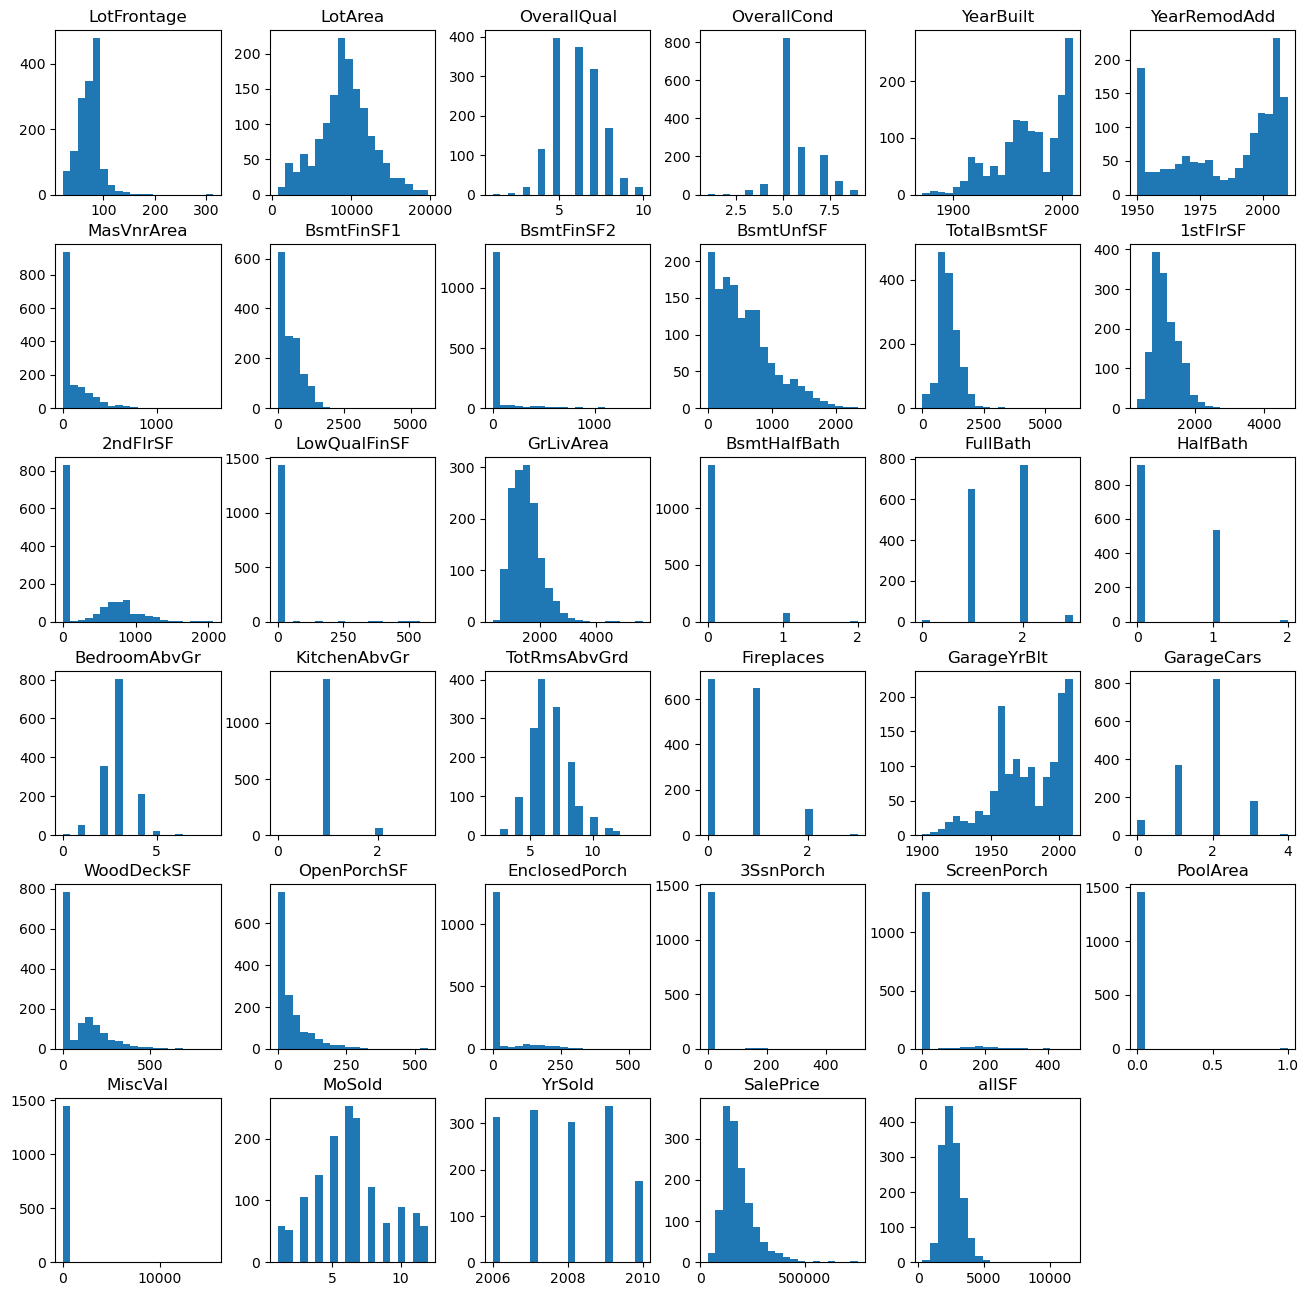

In [40]:
train.hist(figsize=(16,16), bins=20, grid=False)

In [41]:
train[numeric_features].columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'allSF'],
      dtype='object')

In [42]:
# for col in numeric_features:
#     print(train[col].value_counts())

In [43]:
train[numeric_features].columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'allSF'],
      dtype='object')

In [44]:
with open(data_description, 'r') as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
#         if any(feature in line for feature in ['LotFrontage', 'MasVnrType', 'FireplaceQu']):
        if 'YearBuilt' in line:
            print(line)
            for j in range(i+1, min(i+10, len(lines))):
                print(lines[j])

YearBuilt: Original construction date



YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)



RoofStyle: Type of roof



       Flat	Flat

       Gable	Gable

       Gambrel	Gabrel (Barn)

       Hip	Hip



In [45]:
train[nonnumeric_features]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,Id,BsmtFullBath
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,1,1
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,BrkFace,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,2,0
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,3,1
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml,4,1
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,1456,0
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal,1457,1
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,BrkFace,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal,1458,0
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,BrkFace,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,TA,Attchd,Unf,TA,TA,Y,WD,Normal,1459,1


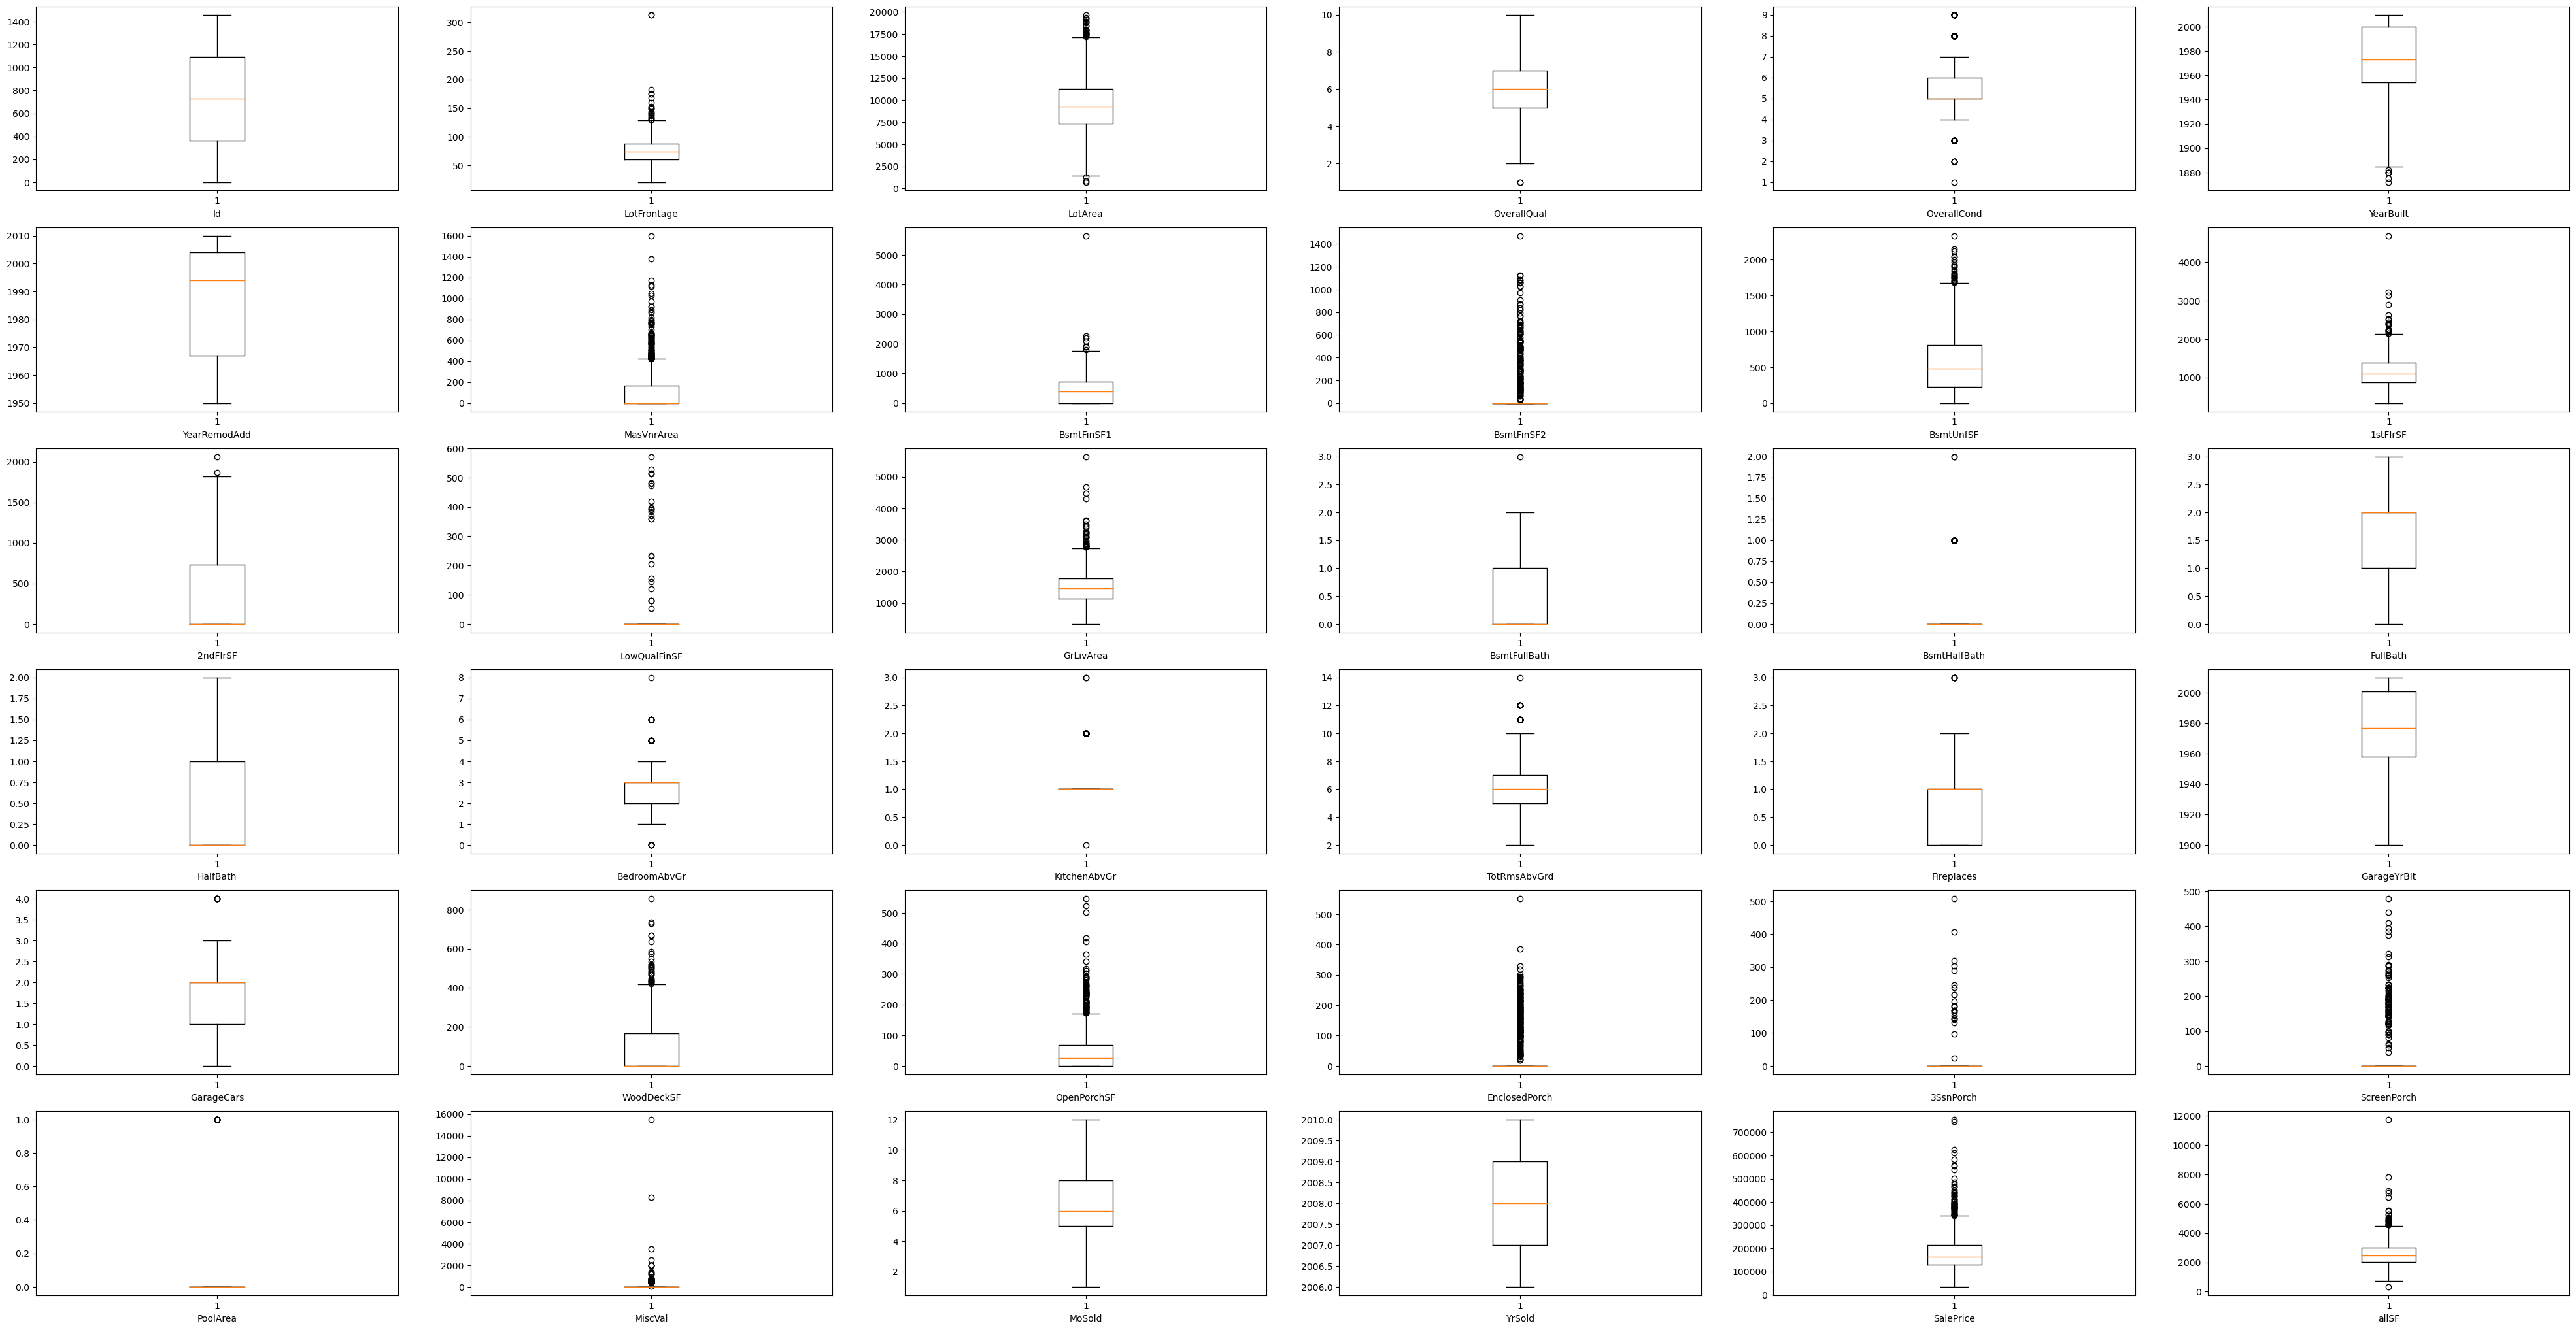

In [46]:
gs = gridspec.GridSpec(7, 6)
plt.figure(figsize=(50,30))

column=0
for i in range(7):
    column_curr=column
    for z in range(6):
        if column_curr <len(numeric_features):
            ax = plt.subplot(gs[i, z])
            ax.boxplot(train[train[numeric_features].columns[column_curr]])
            ax.set_xlabel(train[numeric_features].columns[column_curr])
            column_curr+=1
            column=column_curr
column+=7

plt.show()

In [47]:
train[numeric_features].columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'allSF'],
      dtype='object')

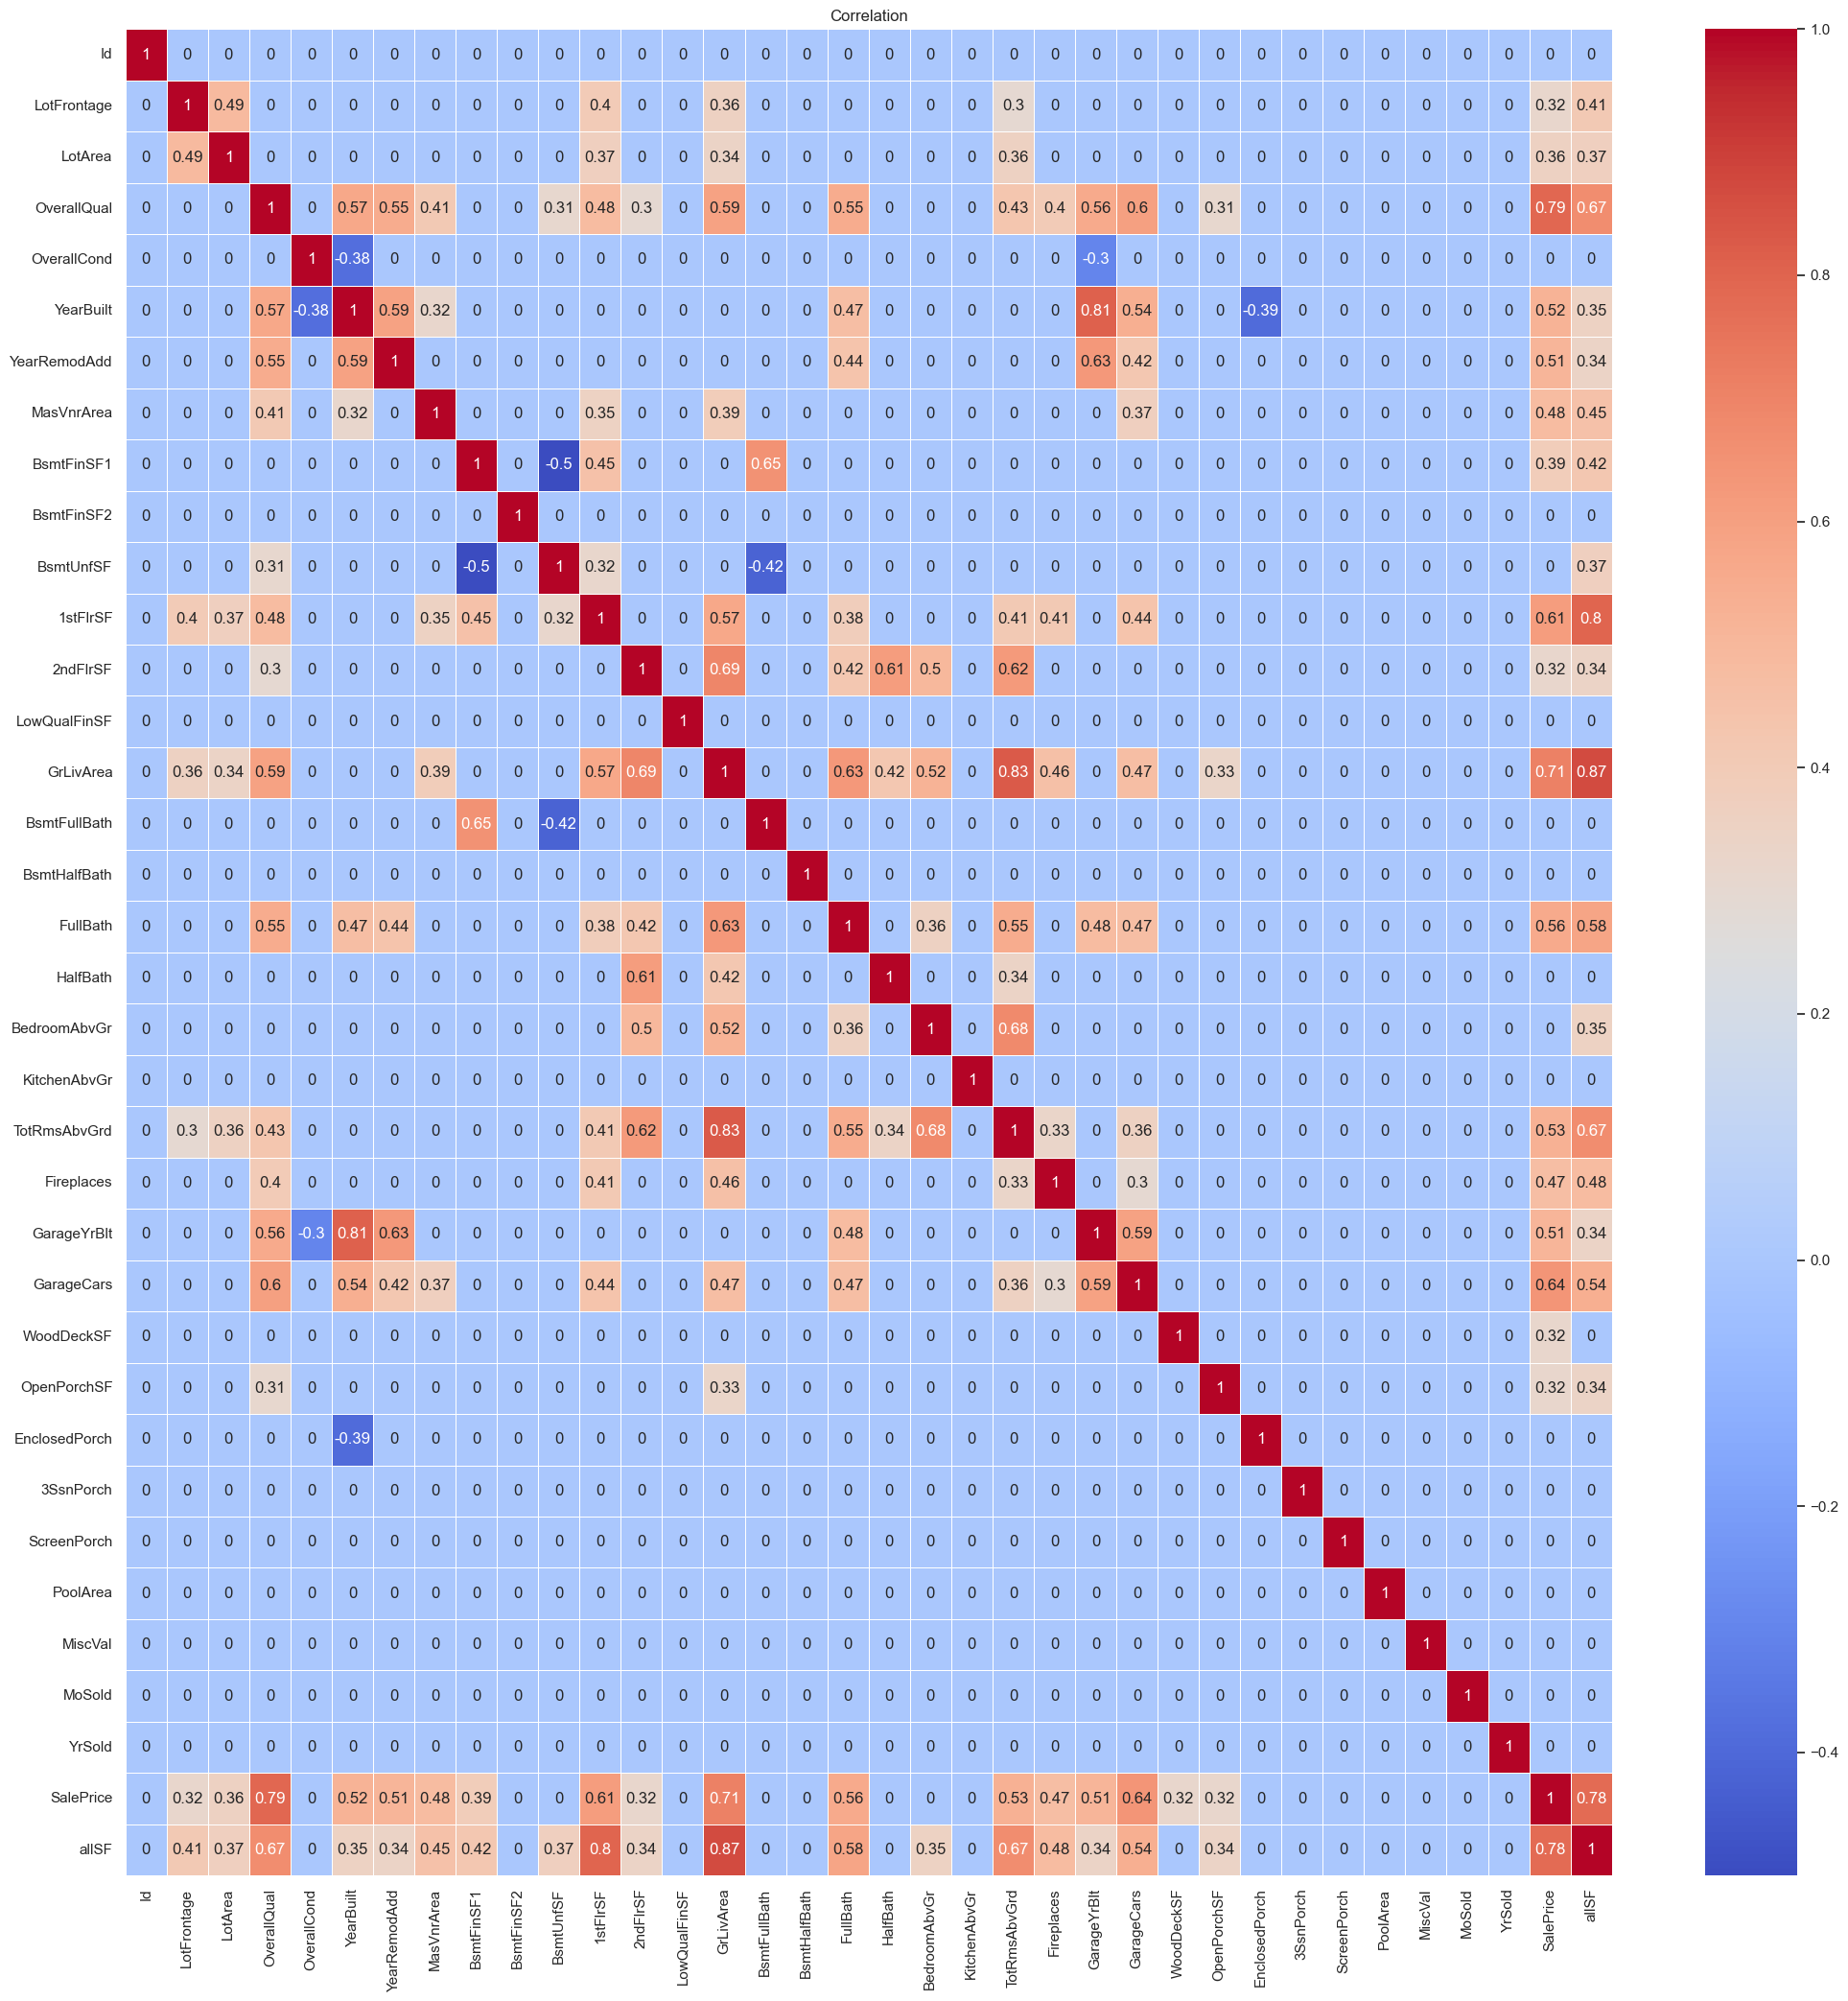

In [48]:
plt.figure(figsize=(25,25))

sns.set(font_scale=1)

corr_matrix=train[numeric_features].corr()
corr_matrix=np.round(corr_matrix,2)
corr_matrix[np.abs(corr_matrix)<0.3]=0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation')
plt.show()

In [49]:
y=train['SalePrice'].to_numpy()
train.drop(columns=['SalePrice'], inplace=True)

In [50]:
numeric_features.remove('SalePrice')

In [51]:
for col in numeric_features:
    train[col]=train[col].astype(str)
    test[col]=test[col].astype(str)

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=2)

In [53]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1168, 75), (1168,), (292, 75), (292,))

In [54]:
import catboost as cb
train_dataset = cb.Pool(train,y,
                        cat_features=nonnumeric_features
)                                                     
# test_dataset = cb.Pool(x_test,y_test,          
#                        cat_features=nonnumeric_features)

In [55]:
CAT=cb.CatBoostRegressor(metric_period=100,
                        #  eval_metric='RMSE',
                         task_type='CPU',
                         iterations=1500, 
                         learning_rate=0.02,
                        #  early_stopping_rounds = 50,
                         depth=8,
                         
                         
                        )
history=CAT.fit(train_dataset,
        # eval_set=test_dataset
)

0:	learn: 78356.6944443	total: 360ms	remaining: 8m 59s
100:	learn: 31576.1669801	total: 18.7s	remaining: 4m 18s
200:	learn: 21802.4097998	total: 30.3s	remaining: 3m 15s
300:	learn: 18197.6648523	total: 41.8s	remaining: 2m 46s
400:	learn: 15962.4896735	total: 53.4s	remaining: 2m 26s
500:	learn: 14460.9253249	total: 1m 4s	remaining: 2m 9s
600:	learn: 13443.7033360	total: 1m 16s	remaining: 1m 54s
700:	learn: 12573.4665158	total: 1m 28s	remaining: 1m 41s
800:	learn: 11978.9250899	total: 1m 41s	remaining: 1m 28s
900:	learn: 11326.7739231	total: 1m 53s	remaining: 1m 15s
1000:	learn: 10636.3765489	total: 2m 5s	remaining: 1m 2s
1100:	learn: 10112.3460032	total: 2m 18s	remaining: 50.2s
1200:	learn: 9624.0611371	total: 2m 31s	remaining: 37.8s
1300:	learn: 9186.4767002	total: 2m 43s	remaining: 25s
1400:	learn: 8816.4902698	total: 2m 55s	remaining: 12.4s
1499:	learn: 8427.6176849	total: 3m 7s	remaining: 0us


In [56]:
feature_importance = CAT.get_feature_importance(train_dataset)
feature_names = train.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

feature_importance_df

,Feature,Importance
74,allSF,25.57
15,OverallQual,9.45
10,Neighborhood,7.09
44,GrLivArea,5.52
28,BsmtQual,3.67
51,KitchenQual,3.44
32,BsmtFinSF1,3.14
59,GarageCars,3.02
25,ExterQual,2.47
52,TotRmsAbvGrd,1.76


In [57]:
y_pred_cat_train=CAT.predict(train)
y_pred_cat_test=CAT.predict(test)

In [58]:
train3=train2.copy()
test3=test2.copy()
y3=y2.copy()

In [59]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
scaler3 = StandardScaler()
# scaler = MinMaxScaler()

train3= scaler.fit_transform(train3).astype(float)
test3 = scaler2.fit_transform(test3).astype(float)
y3 = scaler3.fit_transform(y3.reshape(-1, 1))

In [60]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(train3, y3, test_size=0.2, random_state=2)

In [61]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

MLP = Sequential([
        Dense(10, input_shape=(train3.shape[1],)),
        Dense(1)
    ])

# MLP.summary()

MLP.compile(optimizer='adam', loss='mse')

In [62]:
# early_stopping = EarlyStopping(monitor='loss', patience=50)
history=MLP.fit(train3,y3, 
                epochs=100, 
                # validation_data=(x_test2, y_test2), 
                # callbacks=[early_stopping],
                verbose=False
                )

In [63]:
y_pred_mlp_train=MLP.predict(train3)
y_pred_mlp_test=MLP.predict(test3)

46/46 [==============================] - 0s 3ms/step


In [64]:
y_pred_mlp_train_transform=np.squeeze(scaler3.inverse_transform(y_pred_mlp_train.reshape(-1, 1)))
y_pred_mlp_test_transform=np.squeeze(scaler3.inverse_transform(y_pred_mlp_test.reshape(-1, 1)))
# y_test_after=scaler3.inverse_transform(y_test2.reshape(-1, 1))

In [65]:
# from sklearn.metrics import mean_squared_error
# mse_test_mlp=mean_squared_error(y_test2, y_pred_mlp_test)
# mse_train_mlp=history.history["loss"][-1]
# quantity_of_epochs = history.epoch[-1] + 1

# print(f'MSE on test is {mse_test_mlp:.05f}')
# print(f'MSE on train is {mse_train_mlp:.05f}')
# print(f'The best result stopped on {quantity_of_epochs}')
# print(f'MSE on test_data is more/less train_data by {(mse_test_mlp/mse_train_mlp-1):.03f}')

In [66]:
# print(f'rmse after first launch of MLP is {np.sqrt(np.sum((np.squeeze(y_test_after)-np.squeeze(y_pred_mlp_test_transform))**2)/len(y_pred_mlp_test_transform))}')

In [67]:
# print(f'rmse before MLP cycle is {np.sqrt(np.sum((np.squeeze(y_test_after)-np.squeeze(y_pred_mlp_test_transform))**2)/len(y_pred_mlp_test_transform))}')
# result_train = np.hstack((x_train2, y_pred_mlp_train))
# result_test = np.hstack((x_test2, y_pred_mlp_test))
# x_train2 = result_train
# x_test2 = result_test

# n=5
# for i in range(1, n+1):
#     if i<=4:
#         MLP = Sequential([
#             Dense(i*2, input_shape=(x_train2.shape[1],)),
#             Dropout(0.5),
#             Dense(1)
#         ])
#         MLP.compile(optimizer='sgd', loss='mse')
#     else:
#         MLP = Sequential([
#             Dense(i, input_shape=(x_train2.shape[1],)),
#             Dense(1)
#         ])
#         MLP.compile(optimizer='adam', loss='mse')
#     early_stopping = EarlyStopping(monitor='loss', patience=50)
#     history = MLP.fit(x_train2, y_train2,
#                       epochs=1000,
#                       validation_data=(x_test2, y_test2),
#                       callbacks=[early_stopping],
#                       verbose=False
#                       )
#     y_pred_mlp_train = MLP.predict(x_train2)
#     y_pred_mlp_test = MLP.predict(x_test2)
#     quantity_of_epochs = history.epoch[-1] + 1
#     mse_test_mlp=mean_squared_error(y_test2, y_pred_mlp_test)
#     mse_train_mlp=history.history["loss"][-1]
#     print(f'The best result stopped on {quantity_of_epochs}')
#     print(f'MSE on last test is {mse_test_mlp:.05f}')
#     print(f'MSE on last train is {mse_train_mlp:.05f}')
#     print(f'MSE on last test_data is more/less last train_data by {(mse_test_mlp/mse_train_mlp-1):.03f}')
#     y_pred_test3 = scaler3.inverse_transform(y_pred_mlp_test.reshape(-1, 1))
#     print(f'rmse after {i} MLP cycle is {np.sqrt(np.sum((np.squeeze(y_test_after)-np.squeeze(y_pred_test3))**2)/len(y_pred_test3))}')
#     result_train = np.hstack((x_train2, y_pred_mlp_train))
#     result_test = np.hstack((x_test2, y_pred_mlp_test))
#     x_train2 = result_train
#     x_test2 = result_test
#     i+=1

In [68]:
# y_pred_ml_train=CAT.predict(train)
# y_pred_ml_test=CAT.predict(test)

In [69]:
# gs = gridspec.GridSpec(7, 6)
# plt.figure(figsize=(50,30))

# column=0
# for i in range(7):
#     column_curr=column
#     for z in range(6):
#         if column_curr <len(nonnumeric_features):
#             ax = plt.subplot(gs[i, z])
#             sns.violinplot(data=train[nonnumeric_features], x=train[nonnumeric_features].columns[column_curr], y=y2)
#             ax.set_xlabel(train[nonnumeric_features].columns[column_curr])
#             column_curr+=1
#             column=column_curr
# column+=7

# plt.show()

In [70]:
# gs = gridspec.GridSpec(7, 6)
# plt.figure(figsize=(50,30))

# column=0
# for i in range(7):
#     column_curr=column
#     for z in range(6):
#         if column_curr <len(numeric_features):
#             ax = plt.subplot(gs[i, z])
#             sns.violinplot(data=train2[numeric_features], x=train2[numeric_features].columns[column_curr], y=y2)
#             ax.set_xlabel(train2[numeric_features].columns[column_curr])
#             column_curr+=1
#             column=column_curr
# column+=7

# plt.show()

In [83]:
new_train = pd.DataFrame({'XG_prediction': y_pred_xg_train, 'CAT_prediction': y_pred_cat_train})
new_test = pd.DataFrame({'XG_prediction': y_pred_xg_test, 'CAT_prediction': y_pred_cat_test})
new_y=y.copy()

In [84]:
new_train

,XG_prediction,CAT_prediction
0,208493.91,207863.08
1,181501.67,180058.60
2,223484.48,211848.54
3,140001.09,158234.68
4,250004.14,269123.74
...,...,...
1455,174979.77,176057.42
1456,209996.08,208032.39
1457,266500.19,264489.46
1458,142121.06,139466.12


In [72]:
new_train.shape, new_test.shape, new_y.shape

((1460, 3), (1459, 3), (1460,))

In [73]:
from sklearn.model_selection import train_test_split
x_train3, x_test3, y_train3, y_test3 = train_test_split(new_train, new_y, test_size=0.2, random_state=2)

In [85]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Загрузите предсказания каждой модели в переменные mlp_pred, catboost_pred и xgboost_pred соответственно.

# Создайте список базовых оценщиков.
estimators = [('xgboost', XG), ('catboost', CAT)]

# Создайте финальный оценщик.
final_estimator = RandomForestRegressor()

# Создайте экземпляр класса StackingClassifier.
stacking_clf = StackingRegressor(estimators=estimators, final_estimator=final_estimator)

# Обучите стекинг-модель на предсказаниях каждой модели.
stacking_clf.fit([y_pred_xg_train, y_pred_cat_train], new_y)


CatBoostError: Length of label=1460 and length of data=2 is different.

In [75]:
predictions=stacking_clf.predict(new_test)

1267.3093202605182


In [273]:
# predictions=CAT_final.predict(new_test)
# predictions

array([119793.59240949, 155468.88292954, 182894.61907548, ...,
       154031.49697099, 129587.73060298, 223324.51532156])

In [318]:
# predictions=XG.predict(new_test)
# predictions

array([115056.39, 151709.17, 179218.84, ..., 151772.55, 132459.39,
       235039.42], dtype=float32)

In [77]:
output = pd.DataFrame({'Id': test.Id, 'SalePrice': predictions})
output.to_csv('my_answer17.csv', index=False)